In [237]:

import pandas as pd
import matplotlib.pyplot as plt
inflacja_temp = pd.read_csv('inflacja.csv', sep=';', encoding='utf-8', index_col=False)
bezrobocie_temp = pd.read_csv('bezrobocie.csv', sep=';', encoding='utf-8', index_col=False)


def create_df(df, extra_columns=[], subtract_extra=False):
    df.drop(columns=(['Kod', 'Nazwa', 'Unnamed: 23'] + extra_columns), inplace=True)
    years = []
    values = []
    for (dataName, data) in df.items():
        if type(dataName) is not str:
            continue

        c = dataName.split(';')
        year = int(c[1])
        value = data[0]

        if type(value) is str:
            value = float(value.replace(',', '.'))

        if subtract_extra:
            value -= 100
    
        years.append(year)
        values.append(value)
    return pd.DataFrame({
        'Rok': years,
        'Wartość': values
    })


inflacja = create_df(inflacja_temp, subtract_extra=True)
bezrobocie = create_df(bezrobocie_temp)


<IPython.core.display.Javascript object>

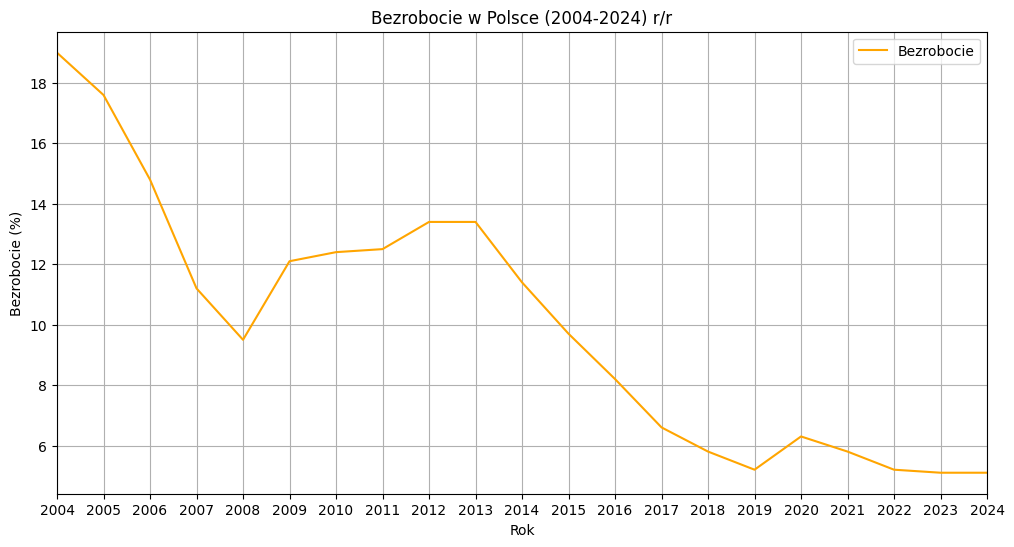

In [238]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(bezrobocie['Rok'].values.astype(str), bezrobocie['Wartość'], label='Bezrobocie', color='orange')
ax.set_xlabel('Rok')
ax.set_ylabel('Bezrobocie (%)')

ax.set_xlim((0, 20))
ax.grid(True)
ax.set_title('Bezrobocie w Polsce (2004-2024) r/r')
ax.legend()


fig.savefig('bezrobocie.png', dpi=300, bbox_inches='tight')
fig

In [239]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(inflacja['Rok'].values.astype(str), inflacja['Wartość'], label='Inflacja', color='blue')
ax.set_xlabel('Rok')
ax.set_ylabel('Inflacja (%)')

ax.set_xlim((0, 20))
ax.grid(True)
ax.set_title('Inflacja w Polsce (2004-2024) r/r')
ax.legend()

fig

fig.savefig('inflacja.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

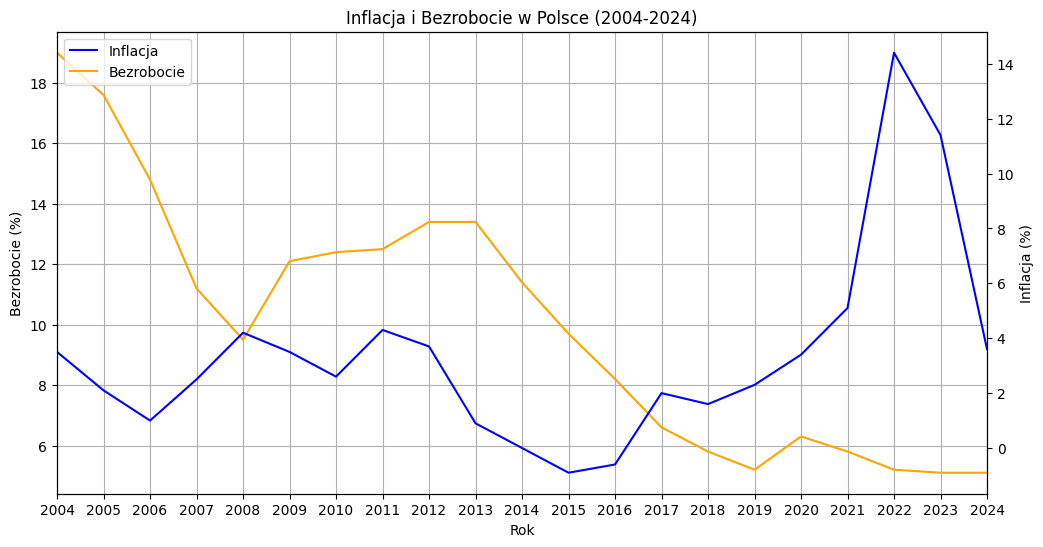

In [240]:
fig, ax = plt.subplots(figsize=(12, 6))

twin1 = ax.twinx()

p1 = twin1.plot(inflacja['Rok'].values.astype(str), inflacja['Wartość'], label='Inflacja', color='blue')
p2 = ax.plot(bezrobocie['Rok'].values.astype(str), bezrobocie['Wartość'], label='Bezrobocie', color='orange')
ax.set_xlabel('Rok')
twin1.set_ylabel('Inflacja (%)')
ax.set_ylabel('Bezrobocie (%)')
ax.grid(True)
ax.set_title('Inflacja i Bezrobocie w Polsce (2004-2024)')
ax.set_xlim((0, 20))
ax.legend(handles=[p1[0], p2[0]], loc='upper left')


fig.savefig('mix.png', dpi=300, bbox_inches='tight')
fig


In [241]:
import sympy as sp 
import numpy as np
x_array = inflacja['Wartość'].values
y_array = bezrobocie['Wartość'].values


x0 = sum(x_array) / len(x_array)  # Uśrednienie wartości bezrobocia
y0 = sum(y_array) / len(y_array)  # Uśrednienie wartości inflacji

x0 = round(x0, 2)
y0 = round(y0, 2)

value_at_0 = 80

t, a, C1 = sp.symbols('t a C1')

x_desired = np.linspace(-10, 100, 200)

def solve_function(x0, y0):
    y = sp.Function('y')(t)


    ode = sp.Eq(y.diff(t), -a * y)
    sol_empty = sp.dsolve(ode, y).rhs




    eq = sp.Eq(sol_empty.subs(t, x0), y0)
    solutions = sp.solve([eq], C1)
    sol_with_constant = sol_empty.subs(solutions)


    eq2 = sp.Eq(sol_with_constant.subs(t, 0), value_at_0)
    solutions2 = sp.solve([eq2], a)
    sol = sol_with_constant.subs({a: solutions2[0][0]})

    y_values = [sol.subs(t, i) for i in x_array]
    y_desire = [sol.subs(t, i) for i in x_desired]

    return sol, y_values, y_desire





def get_distance(sol, x_array, y_array):
    y_vals = [sol.subs(t, i) for i in x_array]
    distance_arr = np.subtract(y_vals, y_array)

    to_delete = []
    for i, el in enumerate(distance_arr):
        if el < 0 or el > 15:
            to_delete.append(i)

    distance_arr = np.delete(distance_arr, to_delete)
    distance = sum(distance_arr) / len(x_array) 
    return 1.5
    # return abs(distance)  # Upewnienie się, że jest dodatni




In [242]:

def make_fig_with_points(y_points, y_points2, y_points3, pointLabel=None):
  fig6, ax6 = plt.subplots(figsize=(12, 6))
  ax6.set_xlim((-3, 25))
  ax6.set_ylim((-3, 25))
  ax6.set_xlabel('Inflacja (%)')
  ax6.set_ylabel('Bezrobocie (%)')
  ax6.set_title('Krzywa Philipsa')
  ax6.grid(True)
  ax6.scatter(x0, y0, s=100, c='red', label=pointLabel, edgecolors='w')
  ax6.scatter(x_array, y_array, c='blue', label="Dane")
  ax6.legend()
  ax6.plot(x_desired, y_points2, label='', color='blue', linewidth=2)
  ax6.plot(x_desired, y_points3, color='blue', linewidth=2)
  ax6.fill_between(x_desired, y_points2, y_points3, color='blue', alpha=0.1, label='Obszar niepewności')
  ax6.plot(x_desired, y_points, label='Rozwiązanie równania', color='green', linewidth=2)
  return fig6, ax6


In [243]:
sol, y_values, y_points = solve_function(x0, y0)
distance = get_distance(sol, x_array, y_array)

In [244]:
display(distance)

1.5

<IPython.core.display.Javascript object>

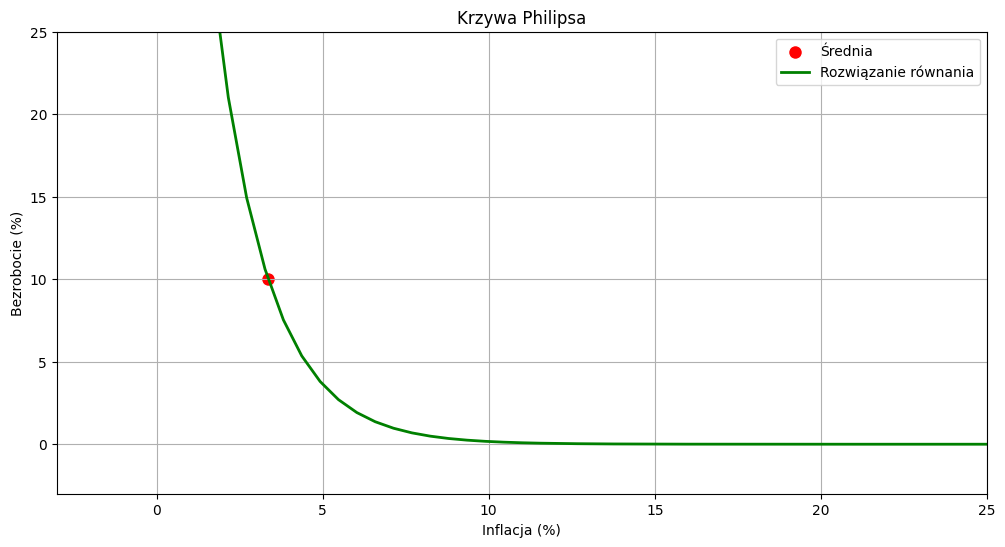

In [245]:
fig2, ax2 = plt.subplots(figsize=(12, 6))

ax2.scatter(x0, y0, c='red', s=100, label='Średnia', edgecolors='w')
ax2.plot(x_desired, y_points, label='Rozwiązanie równania', color='green', linewidth=2)


ax2.set_xlim((-3, 25))
ax2.set_ylim((-3, 25))
ax2.grid(True)
ax2.set_ylabel('Bezrobocie (%)')
ax2.set_xlabel('Inflacja (%)')
ax2.set_title('Krzywa Philipsa')
ax2.legend()



fig2.savefig('pic1.png', dpi=300, bbox_inches='tight')
fig2

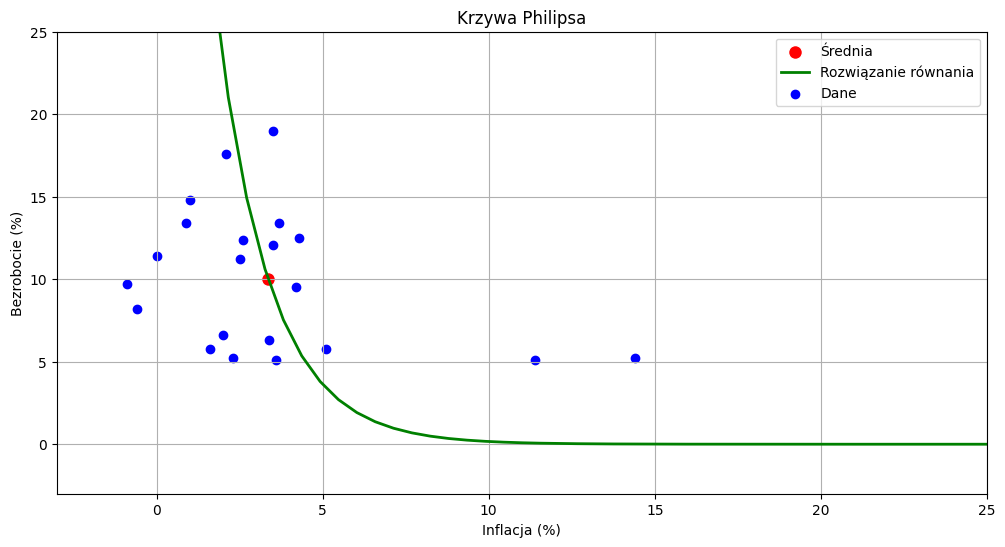

In [246]:
ax2.scatter(x_array, y_array, c='blue', label="Dane")
ax2.legend()

fig2.savefig('pic2.png', dpi=300, bbox_inches='tight')
fig2


In [247]:

def generate_tube(sol, distance):
  y_points2 = [float((sol.subs(t, (i - distance)) + distance).evalf()) for i in x_desired]
  y_points3 = [float((sol.subs(t, (i + distance)) - distance).evalf()) for i in x_desired]
  return y_points2, y_points3

y_points2, y_points3 = generate_tube(sol, distance)

<IPython.core.display.Javascript object>

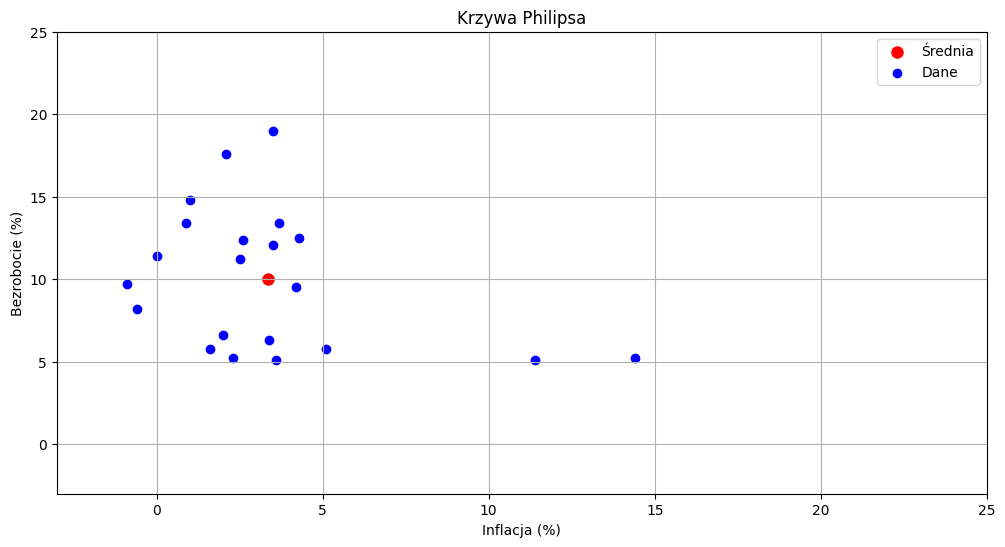

In [248]:
from matplotlib.animation import FuncAnimation

fig3, ax3 = plt.subplots(figsize=(12, 6))
ax3.set_xlim((-3, 25))
ax3.set_ylim((-3, 25))
ax3.set_xlabel('Inflacja (%)')
ax3.set_ylabel('Bezrobocie (%)')
ax3.set_title('Krzywa Philipsa')
ax3.grid(True)
ax3.scatter(x0, y0, c='red', s=100, label='Średnia', edgecolors='w')
ax3.scatter(x_array, y_array, c='blue', label="Dane")
ax3.legend()


fig3.savefig('pic3.png', dpi=300, bbox_inches='tight')
fig3

<IPython.core.display.Javascript object>

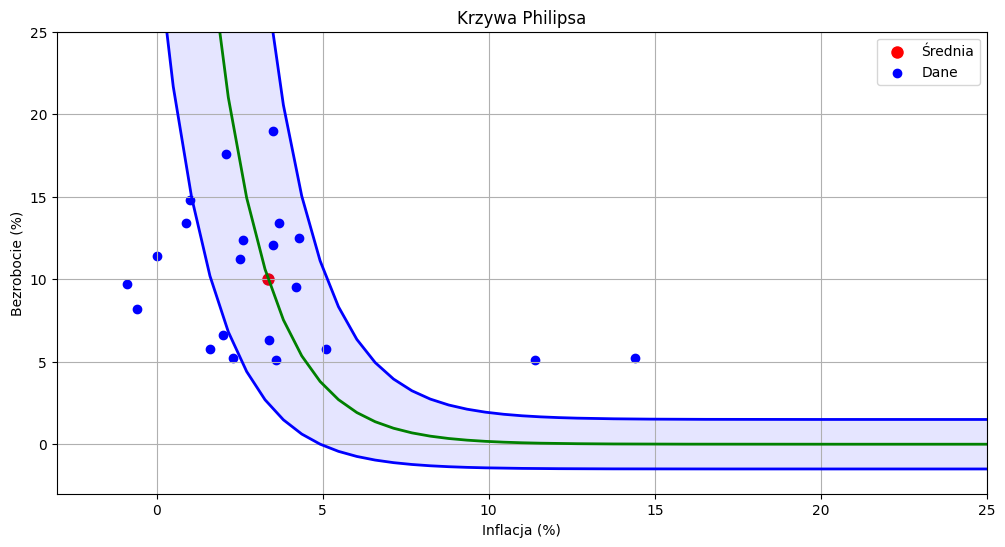

In [249]:

fig2, ax2 = make_fig_with_points(y_points, y_points2, y_points3, pointLabel='Średnia')

fig2.savefig('pic4.png', dpi=300, bbox_inches='tight')
fig2

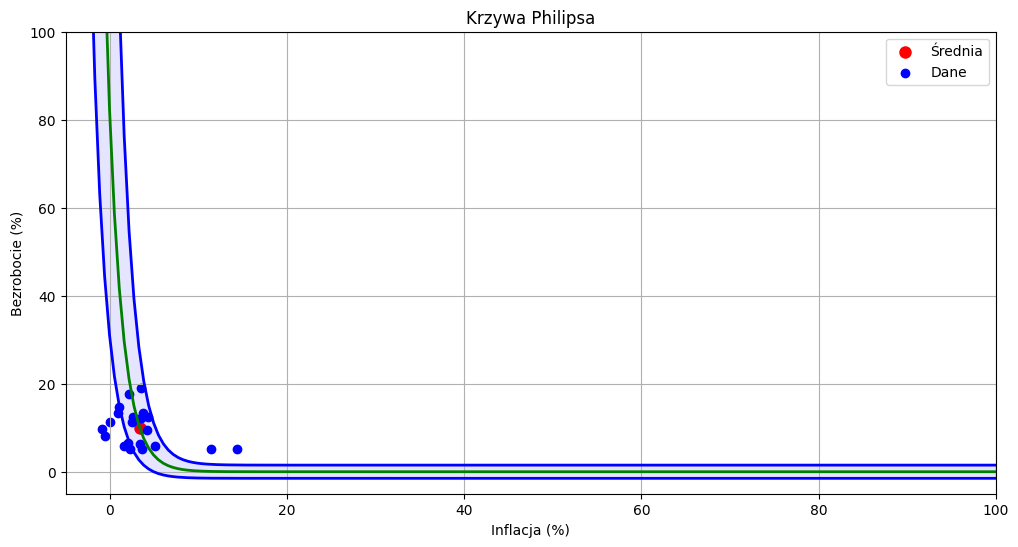

In [250]:
ax2.set(xlim=(-5, 100), ylim=(-5, 100))

fig2.savefig('pic5.png', dpi=300, bbox_inches='tight')
fig2

<IPython.core.display.Javascript object>

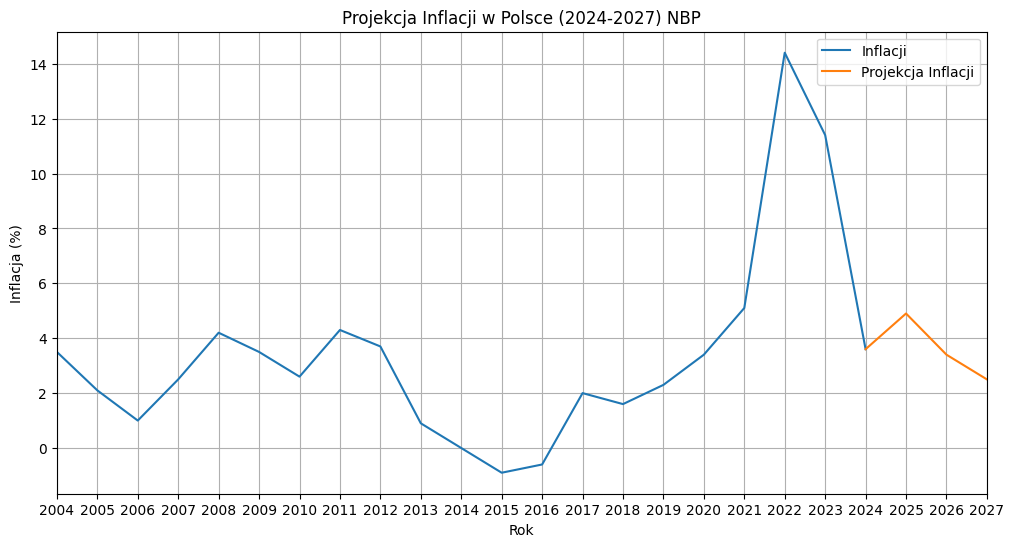

In [251]:
projekcja = pd.read_csv('projekcja.csv', sep=';',  encoding='utf-8', index_col=False)
projekcja.drop(columns=['Unnamed: 2'], inplace=True)


fig3, ax3 = plt.subplots(figsize=(12, 6))

inflation_years = inflacja['Rok'].values
projection_years = projekcja['Rok'].values
inflation_years_total = np.concatenate((inflation_years, projection_years))

inflation_values = inflacja['Wartość'].values
projection_values = projekcja['Wartość'].values
inflation_values_total = np.concatenate((inflation_values, projection_values))

c = ['red' if year < 2024 else 'green' for year in inflation_years_total]


ax3.plot(inflation_years.astype(str), inflation_values, label='Inflacji')
ax3.plot(projection_years.astype(str), projection_values, label='Projekcja Inflacji')
ax3.set_xlim((0, 23))
ax3.grid(True)
ax3.set_xlabel('Rok')
ax3.set_ylabel('Inflacja (%)')
ax3.set_title('Projekcja Inflacji w Polsce (2024-2027) NBP')
ax3.legend()


fig3.savefig('inflacja_projekcja.png', dpi=300, bbox_inches='tight')
fig3

In [252]:

def make_fig_with_texts(ax, sol, distance):
  for k in projection_values:
      value = sol.subs(t, k)
      value_max = sol.subs(t, k - distance) + distance
      value_min = sol.subs(t, k + distance) - distance
      ax.plot([k, k], [value_min, value_max], color='red', linestyle='--', linewidth=0.5)
      ax.scatter(k, value, color='orange')
      ax.scatter(k, value_min, color='orange')
      ax.scatter(k, value_max, color='orange')
      ax.text(k, value, f'{value:.2f}', fontsize=8, ha='center', va='bottom', color='black')
      ax.text(k, value_min, f'{value_min:.2f}', fontsize=8, ha='center', va='top', color='black')
      if(value_max > 25):
          continue    
      ax.text(k, value_max, f'{value_max:.2f}', fontsize=8, ha='center', va='top', color='black')



<IPython.core.display.Javascript object>

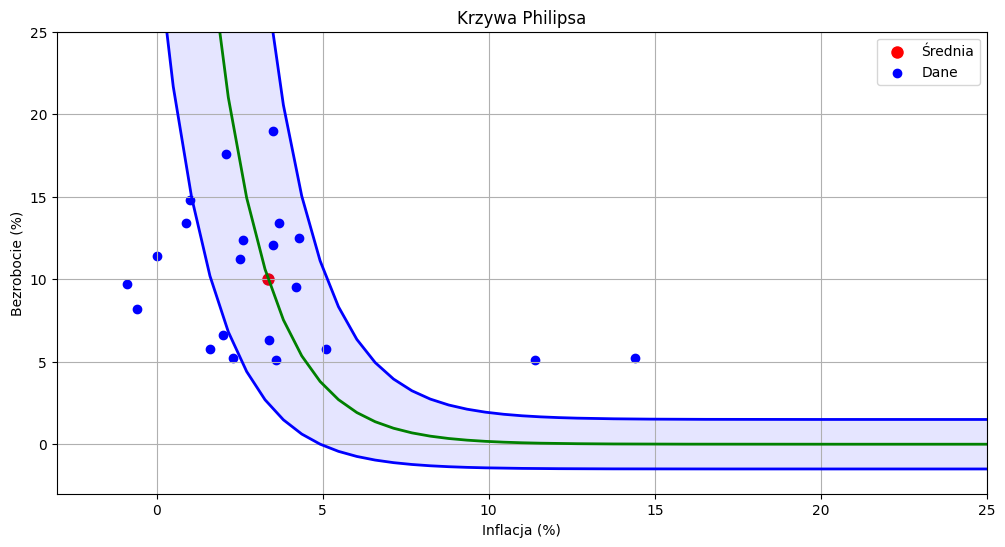

In [253]:
fig5, ax5 = make_fig_with_points(y_points, y_points2, y_points3, pointLabel='Średnia')


fig5.savefig('pic6.png', dpi=300, bbox_inches='tight')
fig5

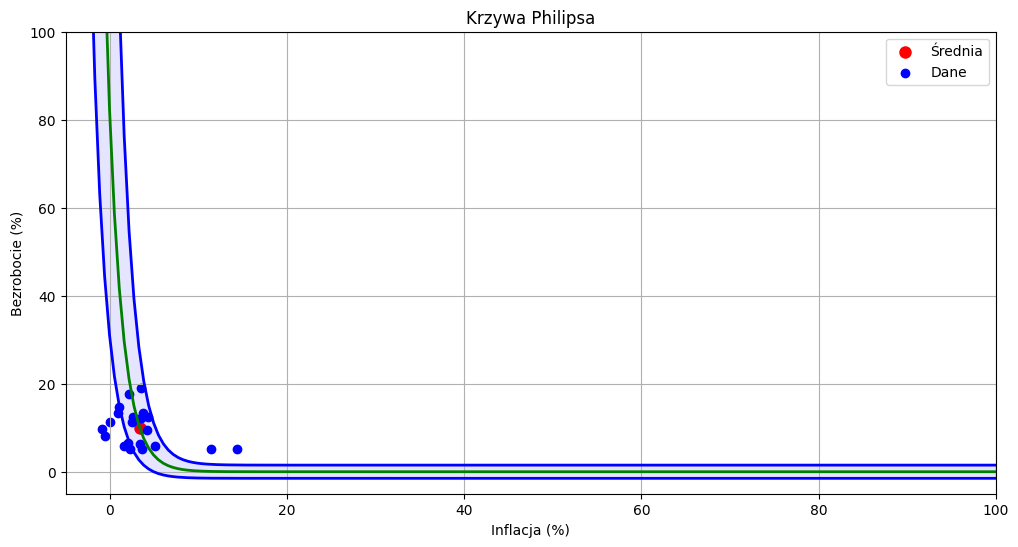

In [254]:
ax5.set(xlim=(-5, 100), ylim=(-5, 100))

fig5.savefig('pic7.png', dpi=300, bbox_inches='tight')
fig5

In [255]:
x0 = 2.5
y0 = 4

sol, y_vals, y_points = solve_function(x0, y0)
distance = get_distance(sol, x_array, y_array)
distance = 1.5
y_points2, y_points3 = generate_tube(sol, distance)


<IPython.core.display.Javascript object>

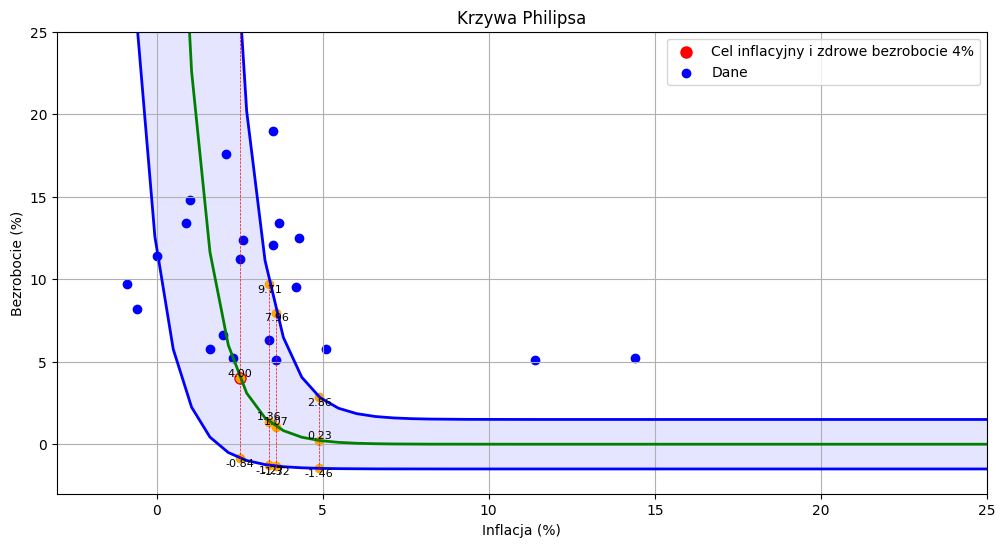

In [256]:
fig6, ax6 = make_fig_with_points(y_points, y_points2, y_points3, pointLabel='Cel inflacyjny i zdrowe bezrobocie 4%')
make_fig_with_texts(ax6, sol, distance)

fig6.savefig('pic8.png', dpi=300, bbox_inches='tight')
fig6

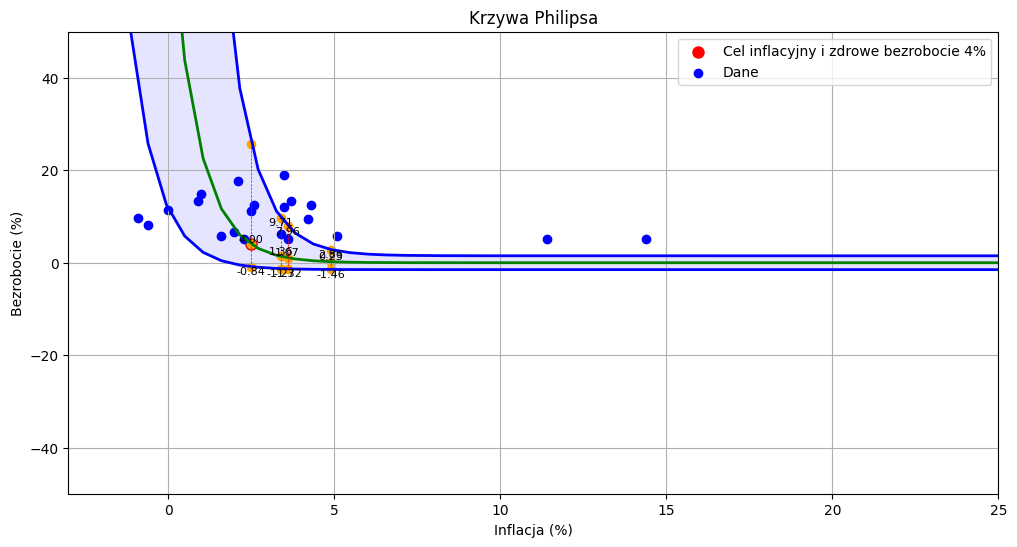

In [257]:
ax6.set_xlim((-3, 25))
ax6.set_ylim((-50, 50))


fig6.savefig('pic9.png', dpi=300, bbox_inches='tight')
fig6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

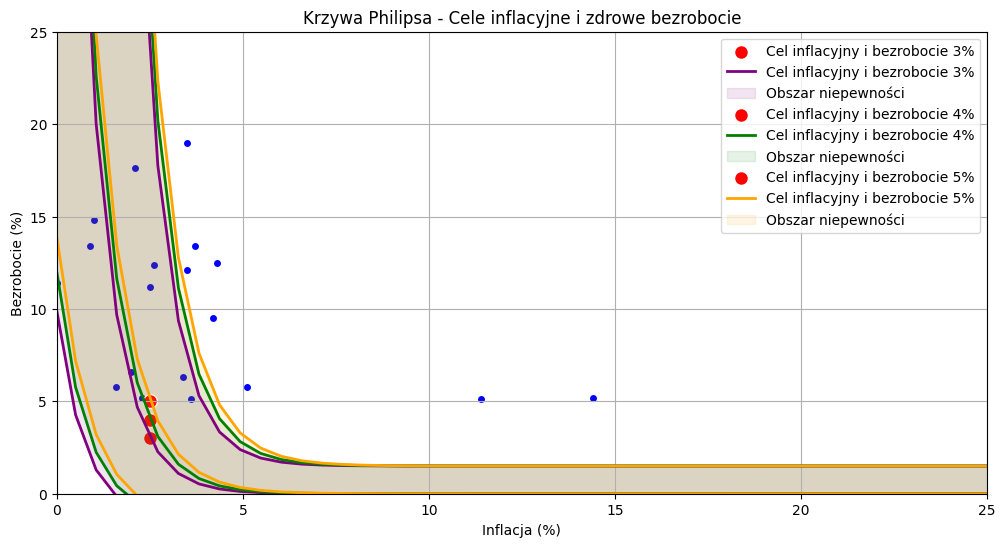

In [258]:
plots = []
figs = []
x0 = 2.5

fig7, ax7 = plt.subplots(figsize=(12, 6))
ax7.set_xlim((0, 25))
ax7.set_ylim((0, 25))
ax7.set_xlabel('Inflacja (%)')
ax7.set_ylabel('Bezrobocie (%)')
ax7.set_title('Krzywa Philipsa - Cele inflacyjne i zdrowe bezrobocie')
ax7.scatter(x_array, y_array, c='blue', edgecolors='w')
ax7.grid(True)

colors = ['orange', 'green', 'purple']

for k in [3,4,5]:
  y0 = k
  sol, y_values, y_points = solve_function(x0, y0)
  
  y_points2, y_points3 = generate_tube(sol, 1.5)
  fig, ax = make_fig_with_points(y_points, y_points2, y_points3, pointLabel=f'Cel inflacyjny i bezrobocie {k}%')
  figs.append((fig, ax))

  c = colors[5 - k]

  ax7.scatter(x0, y0, s=100, c='red', label=f'Cel inflacyjny i bezrobocie {k}%', edgecolors='w')
  ax7.plot(x_desired, y_points, label=f'Cel inflacyjny i bezrobocie {k}%', linewidth=2, color=c)
  ax7.plot(x_desired, y_points2, label='', color=c, linewidth=2)
  ax7.plot(x_desired, y_points3, color=c, linewidth=2)
  ax7.fill_between(x_desired, y_points2, y_points3, color=c, alpha=0.1, label='Obszar niepewności')
  ax7.legend()

fig7.savefig('pic10.png', dpi=300, bbox_inches='tight')
fig7
  


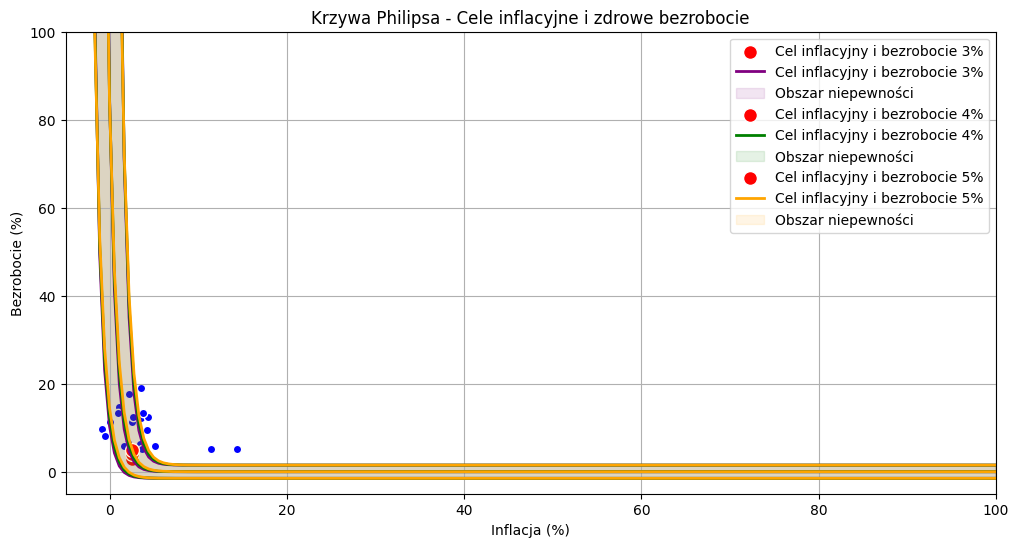

In [259]:
ax7.set(xlim=(-5, 100), ylim=(-5, 100))

fig7.savefig('pic11.png', dpi=300, bbox_inches='tight')
fig7

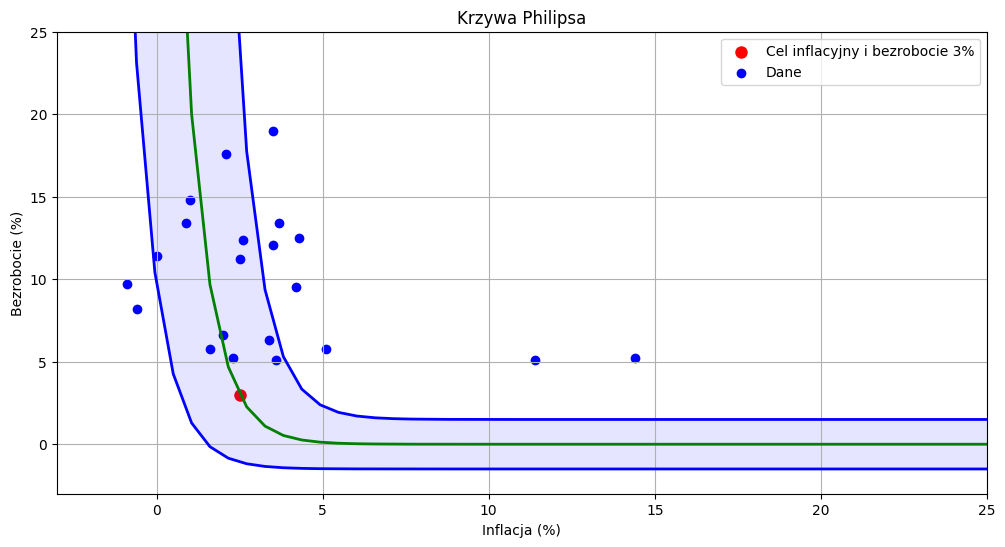

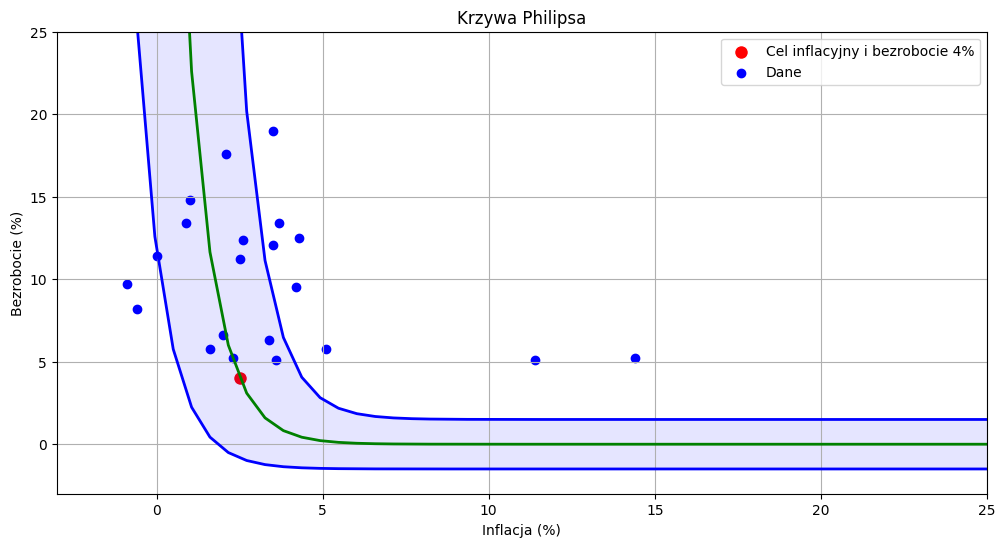

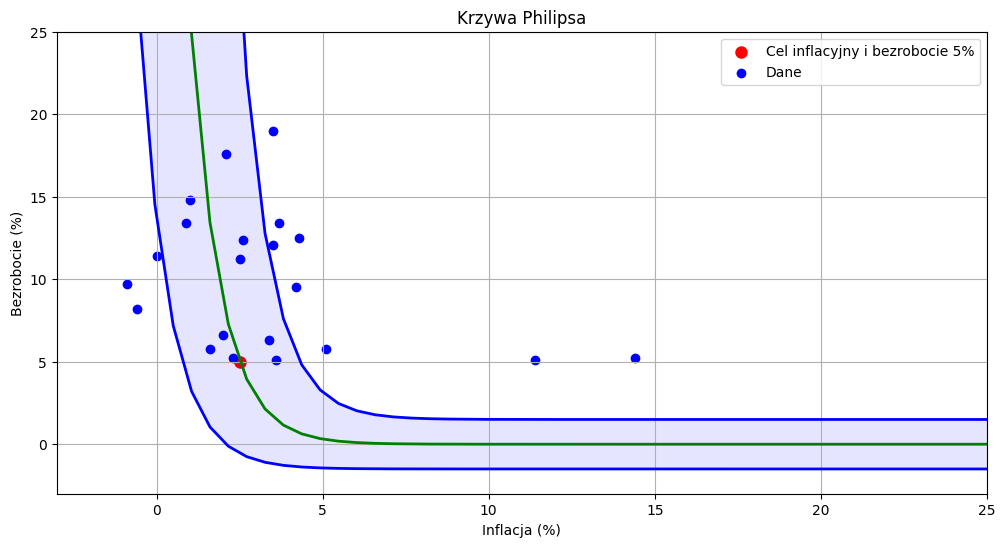

In [260]:
for fig, ax in figs:
  display(fig)
